Erosion

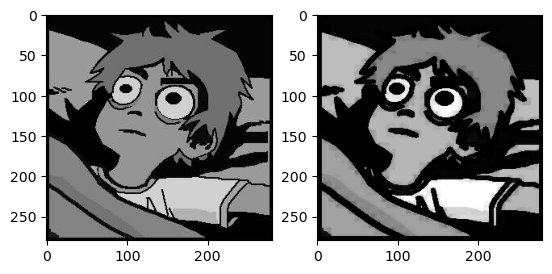

In [5]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

imagen = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))


img_rest = cv2.erode(imagen, kernel)  

plt.subplot(121)
plt.imshow(imagen, cmap='gray')
plt.subplot(122)
plt.imshow(img_rest, cmap='gray')
plt.show()

delate

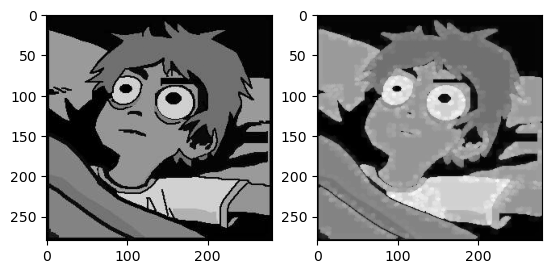

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

imagen = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))


img_rest = cv2.dilate(imagen, kernel)  

plt.subplot(121)
plt.imshow(imagen, cmap='gray')
plt.subplot(122)
plt.imshow(img_rest, cmap='gray')
plt.show()

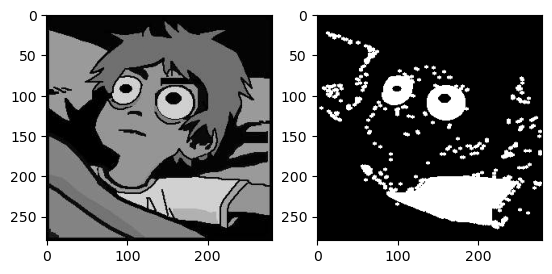

In [7]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

imagen = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)
_,img_bin=cv2.threshold(imagen,127,255,cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))


img_rest = cv2.dilate(img_bin, kernel)  

plt.subplot(121)
plt.imshow(imagen, cmap='gray')
plt.subplot(122)
plt.imshow(img_rest, cmap='gray')
plt.show()

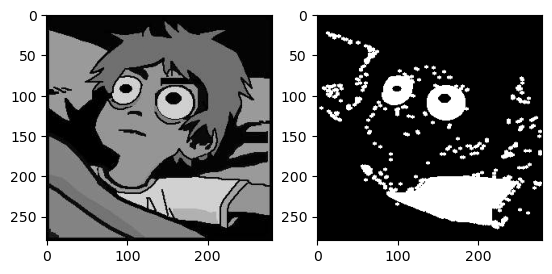

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

imagen = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))


apertura=cv2.morphologyEx(imagen,cv2.MORPH_OPEN,kernel)


plt.subplot(121)
plt.imshow(imagen, cmap='gray')
plt.subplot(122)
plt.imshow(img_rest, cmap='gray')
plt.show()

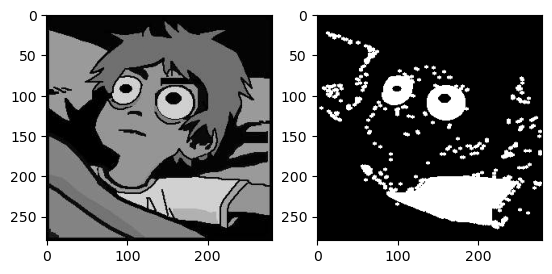

In [11]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

imagen = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))


apertura=cv2.morphologyEx(imagen,cv2.MORPH_CLOSE,kernel)


plt.subplot(121)
plt.imshow(imagen, cmap='gray')
plt.subplot(122)
plt.imshow(img_rest, cmap='gray')
plt.show()

UTILIZAR SKIMAGE CON EROSION DILATACION APERTURA Y CERRADURA 

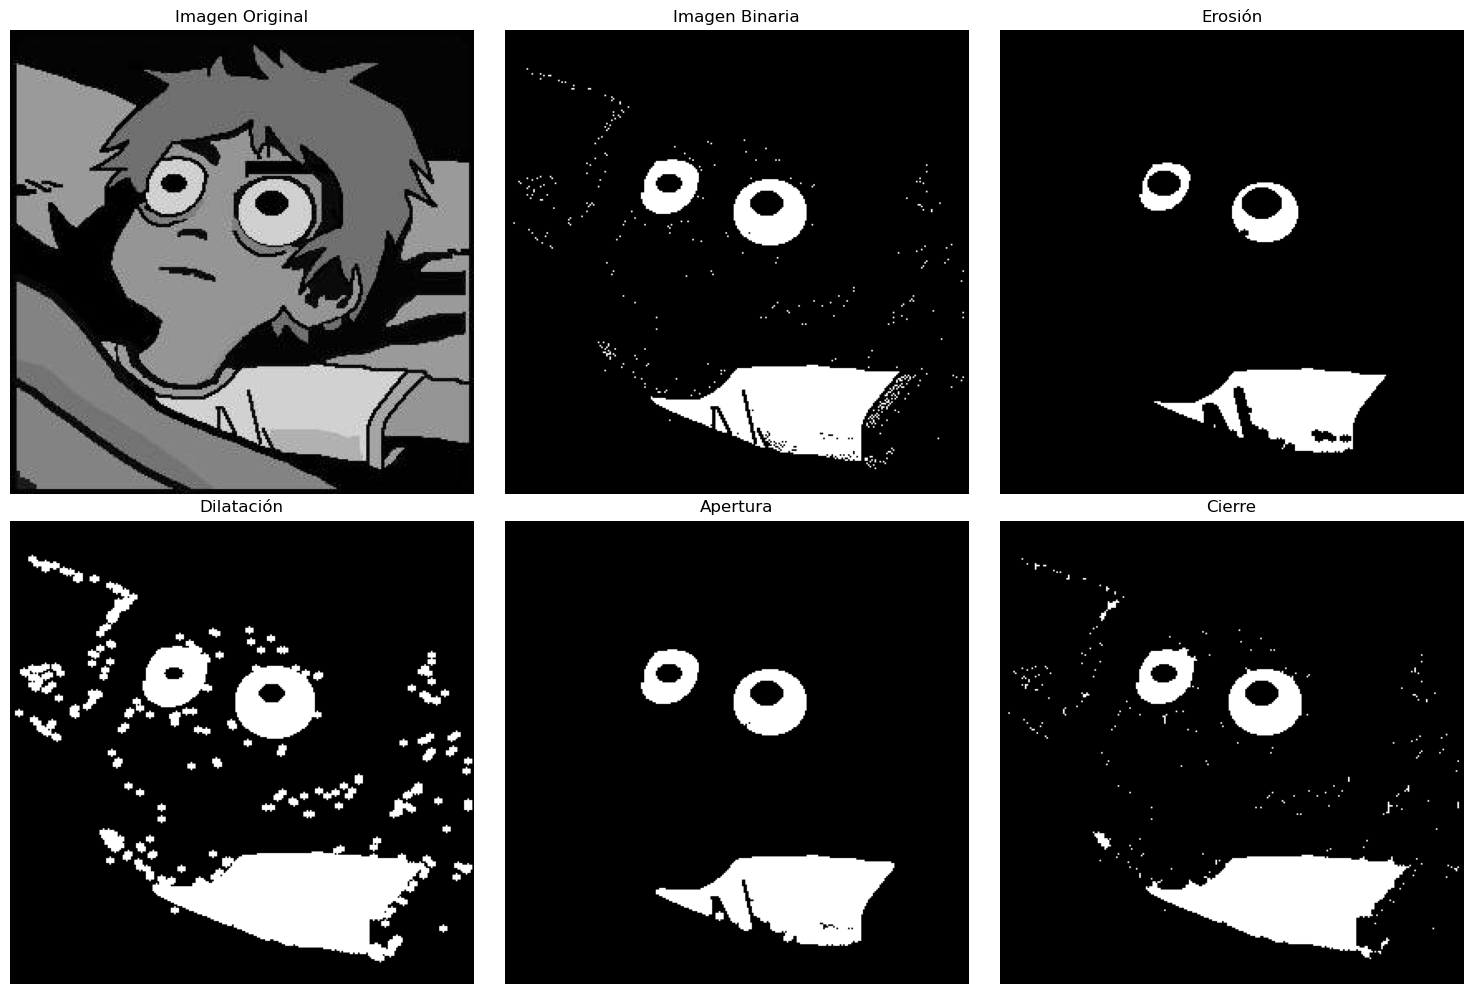

In [ ]:
from skimage import morphology
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

_, imagen_binaria = cv2.threshold(imagen, 128, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

img_erosion = cv2.erode(imagen_binaria, kernel, iterations=1)


img_dilatacion = cv2.dilate(imagen_binaria, kernel, iterations=1)

img_apertura = cv2.morphologyEx(imagen_binaria, cv2.MORPH_OPEN, kernel)


img_cierre = cv2.morphologyEx(imagen_binaria, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen Binaria')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_erosion, cmap='gray')
plt.title('Erosión')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_dilatacion, cmap='gray')
plt.title('Dilatación')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_apertura, cmap='gray')
plt.title('Apertura')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_cierre, cmap='gray')
plt.title('Cierre')
plt.axis('off')

plt.tight_layout()
plt.show()

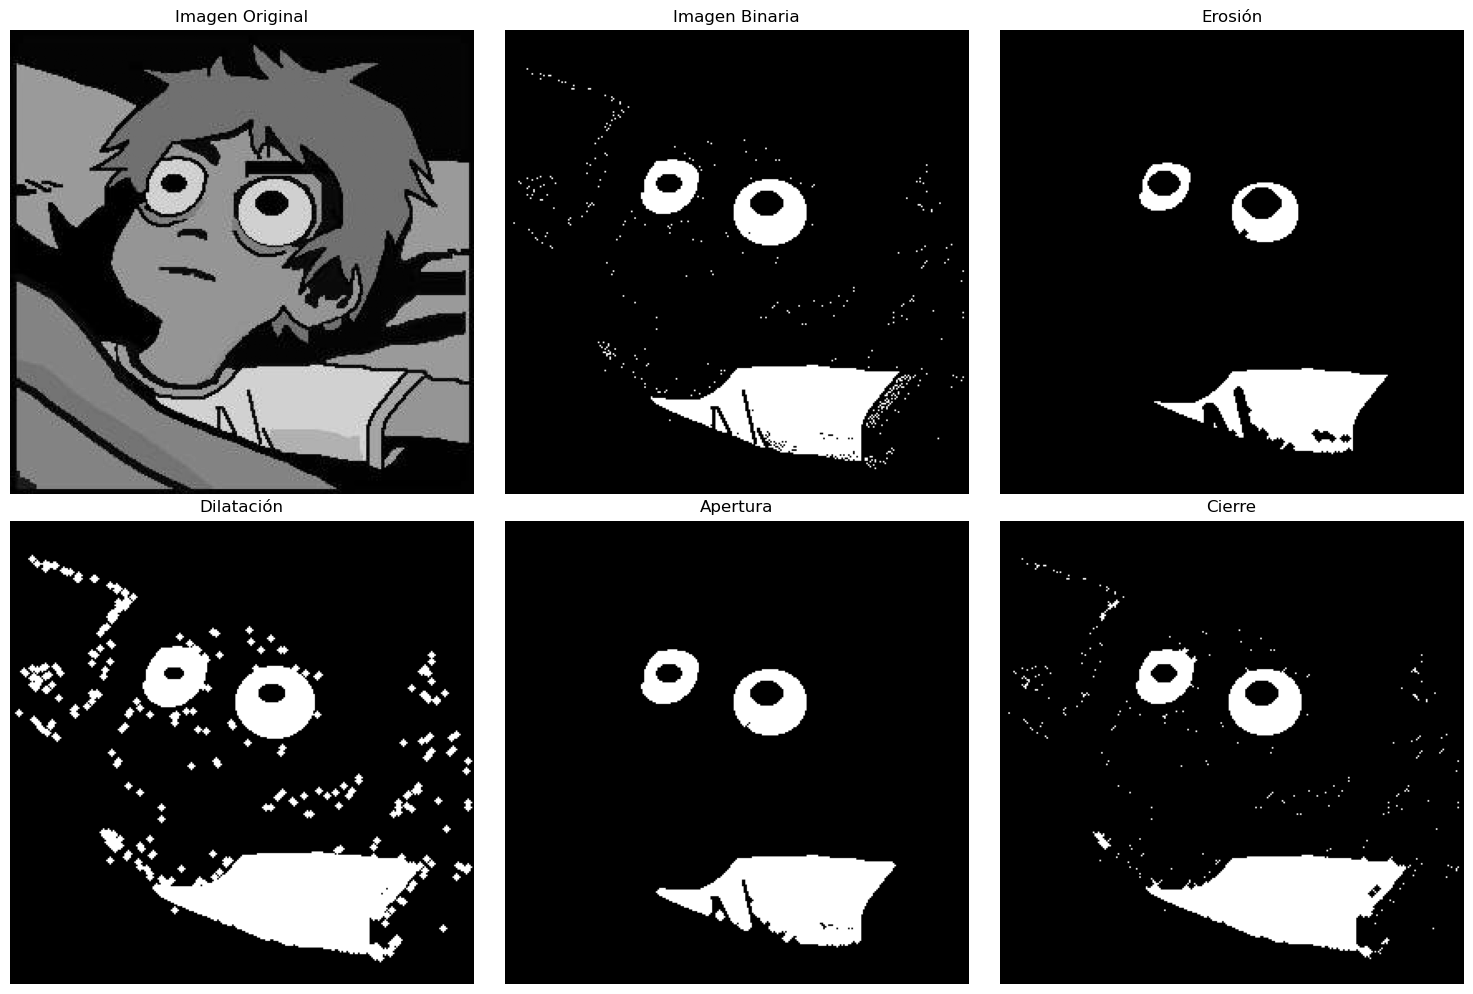

In [14]:
from skimage import morphology
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

_, imagen_binaria = cv2.threshold(imagen, 128, 255, cv2.THRESH_BINARY)

kernel = morphology.disk(2)  

img_erosion = morphology.erosion(imagen_binaria, kernel)

img_dilatacion = morphology.dilation(imagen_binaria, kernel)


img_apertura = morphology.opening(imagen_binaria, kernel)

img_cierre = morphology.closing(imagen_binaria, kernel)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen Binaria')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_erosion, cmap='gray')
plt.title('Erosión')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_dilatacion, cmap='gray')
plt.title('Dilatación')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_apertura, cmap='gray')
plt.title('Apertura')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_cierre, cmap='gray')
plt.title('Cierre')
plt.axis('off')

plt.tight_layout()
plt.show()

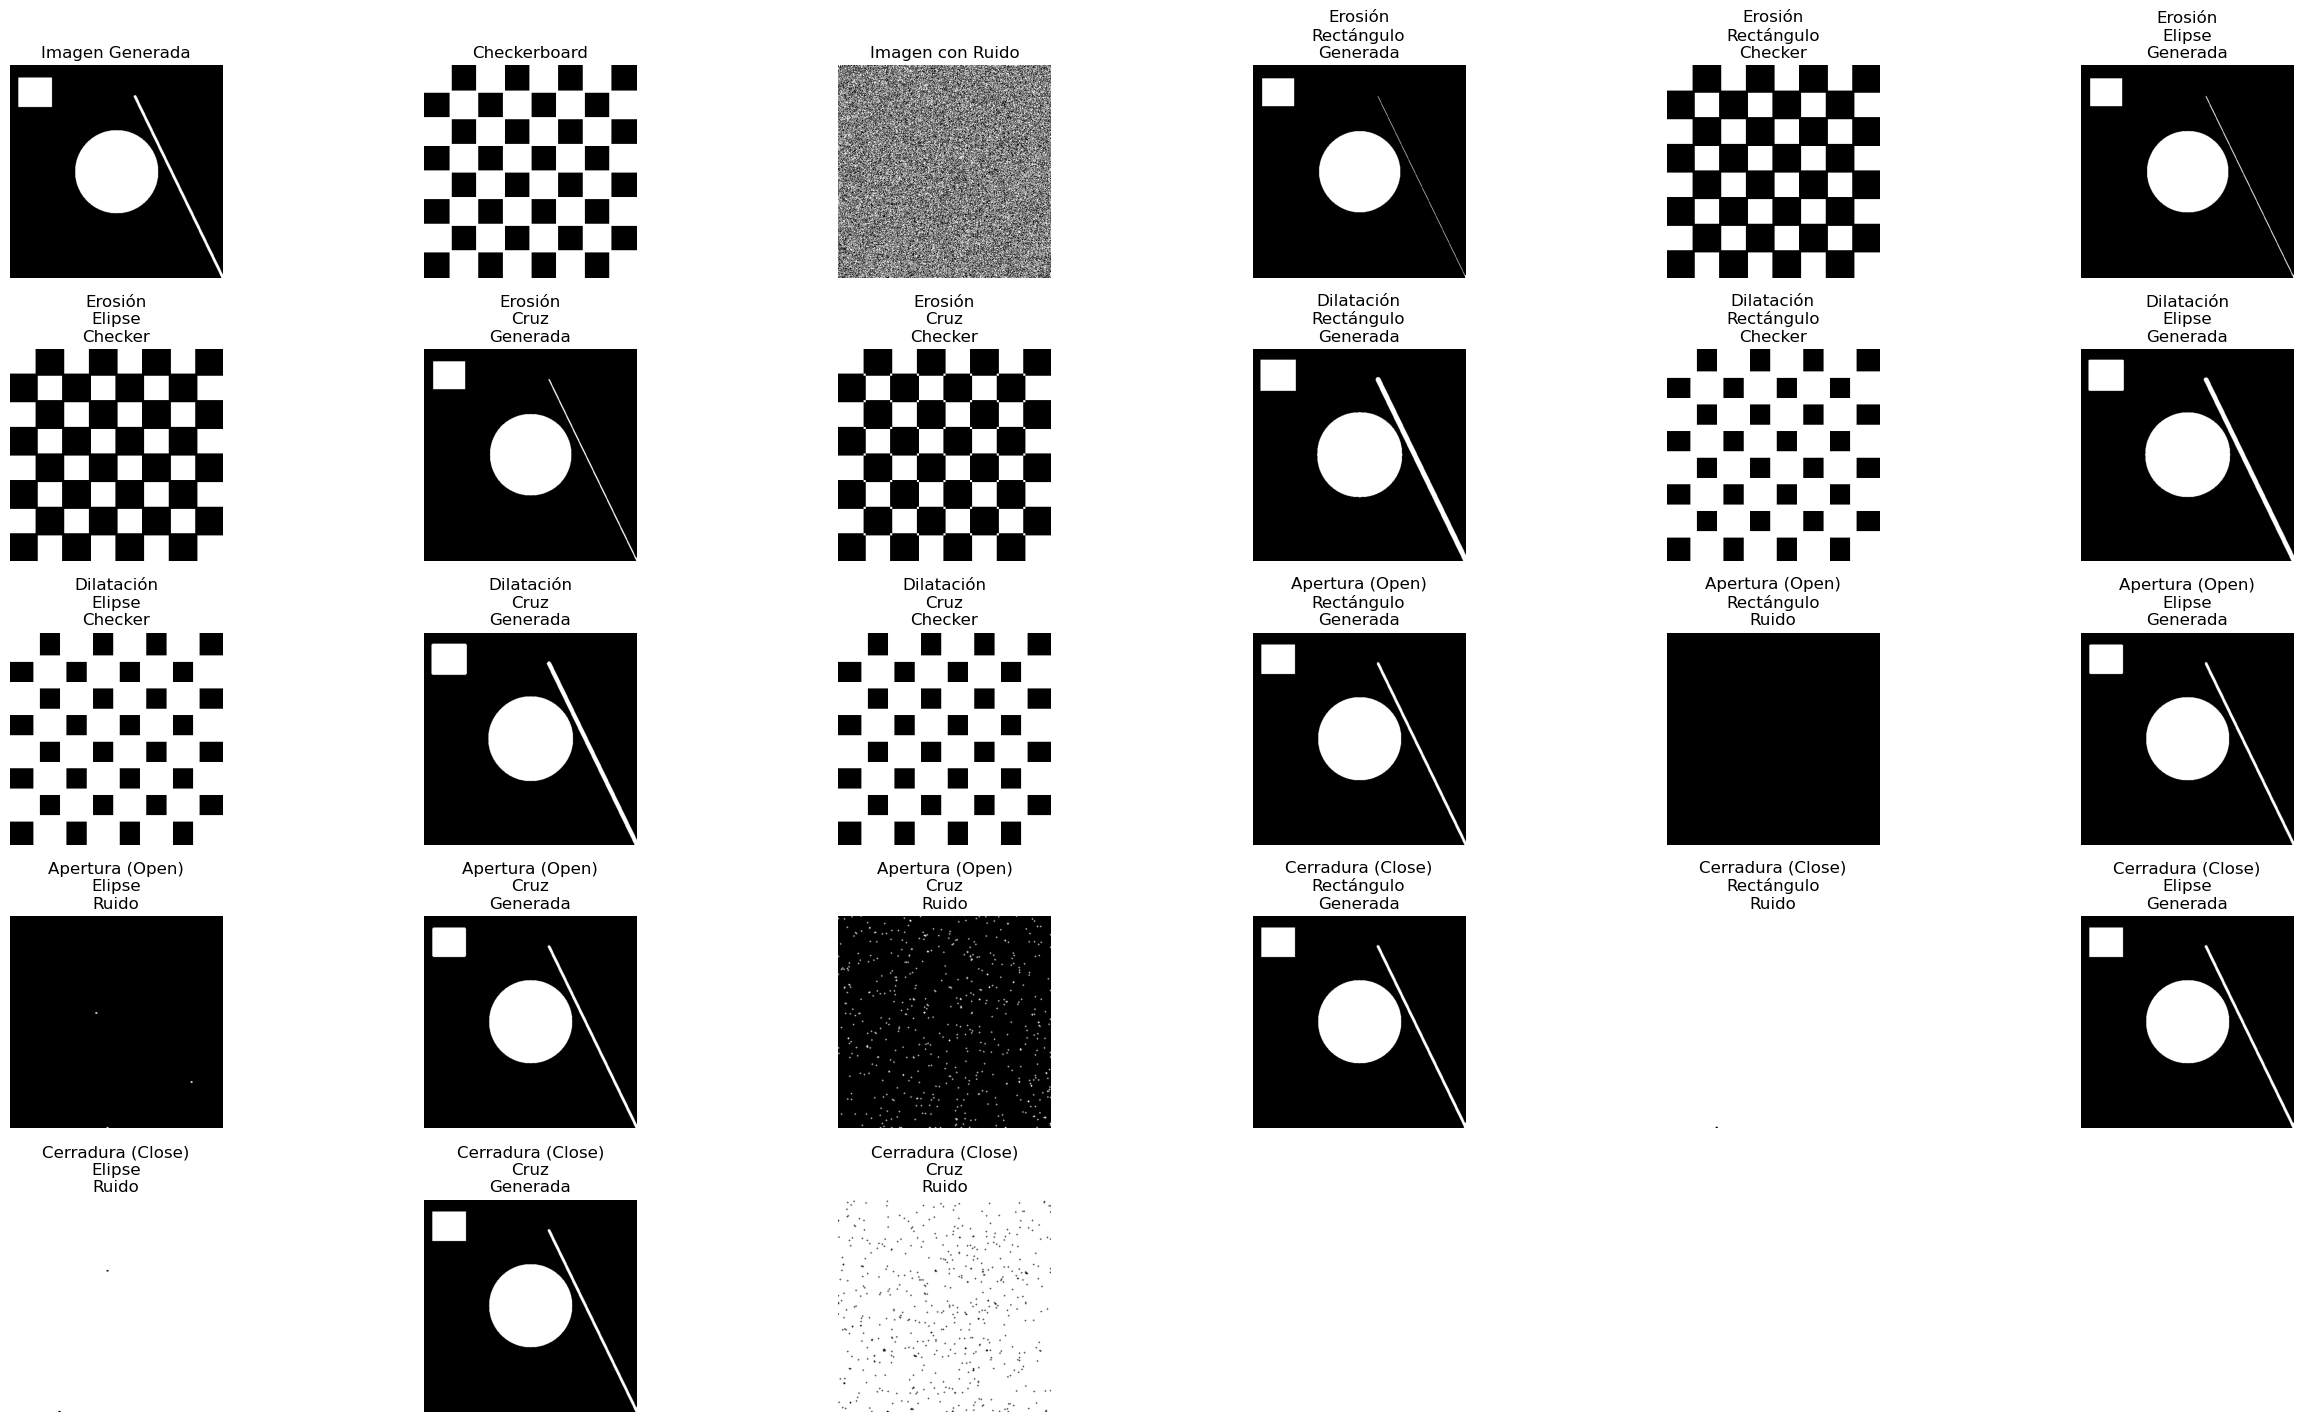

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import checkerboard

imagen_generada = np.zeros((512, 512), dtype=np.uint8)
imagen_generada = cv2.circle(imagen_generada, (256, 256), 100, (255), -1)
imagen_generada = cv2.rectangle(imagen_generada, (20, 30), (100, 100), (255), -1)
imagen_generada = cv2.line(imagen_generada, (300, 75), (512, 512), (255), 5)

cheker = (checkerboard() > 0.5).astype(np.uint8) * 255

np.random.seed(42)
imagen_ruido = imagen_generada.copy()
ruido = np.random.randint(0, 2, imagen_generada.shape, dtype=np.uint8) * 255
imagen_ruido = cv2.bitwise_xor(imagen_ruido, ruido)

kernels = {
    'Rectángulo': cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
    'Elipse': cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)),
    'Cruz': cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
}

operations = {
    'Erosión': cv2.erode,
    'Dilatación': cv2.dilate,
    'Apertura (Open)': lambda img, kernel: cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel),
    'Cerradura (Close)': lambda img, kernel: cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
}

plt.figure(figsize=(25, 20))

plt.subplot(7, 6, 1)
plt.imshow(imagen_generada, cmap='gray')
plt.title('Imagen Generada')
plt.axis('off')

plt.subplot(7, 6, 2)
plt.imshow(cheker, cmap='gray')
plt.title('Checkerboard')
plt.axis('off')

plt.subplot(7, 6, 3)
plt.imshow(imagen_ruido, cmap='gray')
plt.title('Imagen con Ruido')
plt.axis('off')

plot_idx = 4
for op_name, op_func in operations.items():
    for kernel_name, kernel in kernels.items():
        result_gen = op_func(imagen_generada, kernel)
        result_chk = op_func(cheker, kernel) if op_name in ['Erosión', 'Dilatación'] else None
        result_ruido = op_func(imagen_ruido, kernel) if op_name in ['Apertura (Open)', 'Cerradura (Close)'] else None

        if plot_idx <= 42:
            plt.subplot(7, 6, plot_idx)
            plt.imshow(result_gen, cmap='gray')
            plt.title(f'{op_name}\n{kernel_name}\nGenerada')
            plt.axis('off')
            plot_idx += 1

        if result_chk is not None and plot_idx <= 42:
            plt.subplot(7, 6, plot_idx)
            plt.imshow(result_chk, cmap='gray')
            plt.title(f'{op_name}\n{kernel_name}\nChecker')
            plt.axis('off')
            plot_idx += 1

        if result_ruido is not None and plot_idx <= 42:
            plt.subplot(7, 6, plot_idx)
            plt.imshow(result_ruido, cmap='gray')
            plt.title(f'{op_name}\n{kernel_name}\nRuido')
            plt.axis('off')
            plot_idx += 1

plt.tight_layout()
plt.show()
